In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
data_1km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_persistance_output.csv", index_col='date')
data_1km_pers.index = pd.to_datetime(data_1km_pers.index, format='%Y-%m-%d')

data_10km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_persistance_output.csv", index_col='date')
data_10km_pers.index = pd.to_datetime(data_10km_pers.index, format='%Y-%m-%d')

data_10km_pers['IIEE'] = data_10km_pers['IIEE']  # Adjust for erronous IIEE implementation
data_1km_pers['mean_length'] = data_1km_pers['mean_length'] / 1000.
data_10km_pers['mean_length'] = data_10km_pers['mean_length'] / 1000.

In [4]:
(data_1km_pers['IIEE'] / data_10km_pers['IIEE']).mean()

0.9938082054098228

In [5]:
data_1km_pers['IIEE']

date
2019-01-04    102861
2019-01-09     69755
2019-01-10     75580
2019-01-11    134833
2019-01-16     94663
               ...  
2021-12-22     65322
2021-12-23     80916
2021-12-29     90533
2021-12-30     66327
2021-12-31     68918
Name: IIEE, Length: 421, dtype: int64

In [6]:
data_10km_pers['IIEE']

date
2019-01-04    106500
2019-01-09     69600
2019-01-10     75600
2019-01-11    135800
2019-01-16     95100
               ...  
2021-12-22     68500
2021-12-23     81800
2021-12-29     89000
2021-12-30     67200
2021-12-31     68300
Name: IIEE, Length: 421, dtype: int64

In [7]:
data_1km_pers['mean_length'].corr(data_1km_pers['IIEE'])

0.6085017875230833

In [8]:
data_10km_pers['mean_length'].corr(data_10km_pers['IIEE'])

0.6651745162812851

In [9]:
data_1km_pers['mean_length'].corr(data_10km_pers['mean_length'])

0.9620461484434745

In [10]:
data_1km_pers['IIEE'].corr(data_10km_pers['IIEE'])

0.9995073627445231

In [11]:
(data_1km_pers['IIEE']/data_1km_pers['mean_length']).corr((data_10km_pers['IIEE'] / data_10km_pers['mean_length']))

0.9667108300002144

In [12]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_10km = monthly_mean_IIEE_10km / monthly_mean_lenght_10km

In [13]:
monthly_mean_lenght_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_1km = monthly_mean_IIEE_1km / monthly_mean_lenght_1km

In [14]:
print(normalized_iiee_10km)
print(normalized_iiee_1km)

date
2019-01-31    19.870811
2019-02-28    18.611901
2019-03-31    21.677927
2019-04-30    20.091938
2019-05-31    21.586258
2019-06-30    17.746593
2019-07-31    17.497586
2019-08-31    14.470908
2019-09-30    18.182112
2019-10-31    17.109540
2019-11-30    21.812540
2019-12-31    20.551141
2020-01-31    24.491390
2020-02-29    25.336092
2020-03-31    21.624884
2020-04-30    23.760070
2020-05-31    22.279541
2020-06-30    16.532107
2020-07-31    17.686838
2020-08-31    17.012629
2020-09-30    20.514531
2020-10-31    16.818679
2020-11-30    25.822561
2020-12-31    38.765958
2021-01-31    24.576432
2021-02-28    18.097203
2021-03-31    22.633097
2021-04-30    25.978797
2021-05-31    19.159300
2021-06-30    17.506622
2021-07-31    15.980570
2021-08-31    15.474155
2021-09-30    21.010737
2021-10-31    21.174092
2021-11-30    22.983631
2021-12-31    18.323962
Freq: M, dtype: float64
date
2019-01-31    10.311351
2019-02-28     9.646287
2019-03-31    11.765920
2019-04-30    11.102298
2019-0

In [15]:
normalized_iiee_1km.corr(normalized_iiee_10km)

0.9785940872783626

In [16]:
normalized_iiee_1km_by_10km = monthly_mean_IIEE_1km / monthly_mean_lenght_10km

In [17]:
print(normalized_iiee_1km_by_10km)

date
2019-01-31    19.646875
2019-02-28    18.452658
2019-03-31    21.700518
2019-04-30    19.999084
2019-05-31    21.362399
2019-06-30    17.596459
2019-07-31    17.343843
2019-08-31    14.225833
2019-09-30    18.027248
2019-10-31    16.998089
2019-11-30    21.671517
2019-12-31    20.303823
2020-01-31    24.539250
2020-02-29    25.128610
2020-03-31    21.656206
2020-04-30    23.657410
2020-05-31    22.099362
2020-06-30    16.489454
2020-07-31    17.553183
2020-08-31    16.915893
2020-09-30    20.210015
2020-10-31    16.658493
2020-11-30    25.789019
2020-12-31    38.712547
2021-01-31    24.474163
2021-02-28    18.021131
2021-03-31    22.614999
2021-04-30    25.878745
2021-05-31    18.986660
2021-06-30    17.464927
2021-07-31    15.920657
2021-08-31    15.225377
2021-09-30    20.884006
2021-10-31    21.194958
2021-11-30    22.720983
2021-12-31    18.269762
Freq: M, dtype: float64


In [18]:
normalized_iiee_1km.corr(normalized_iiee_1km_by_10km)

0.9796868637012152

In [19]:
print((monthly_mean_lenght_1km / monthly_mean_lenght_10km).mean())

1.9034759427324524


In [20]:
print((normalized_iiee_1km / normalized_iiee_10km).mean())

0.5235183856269209


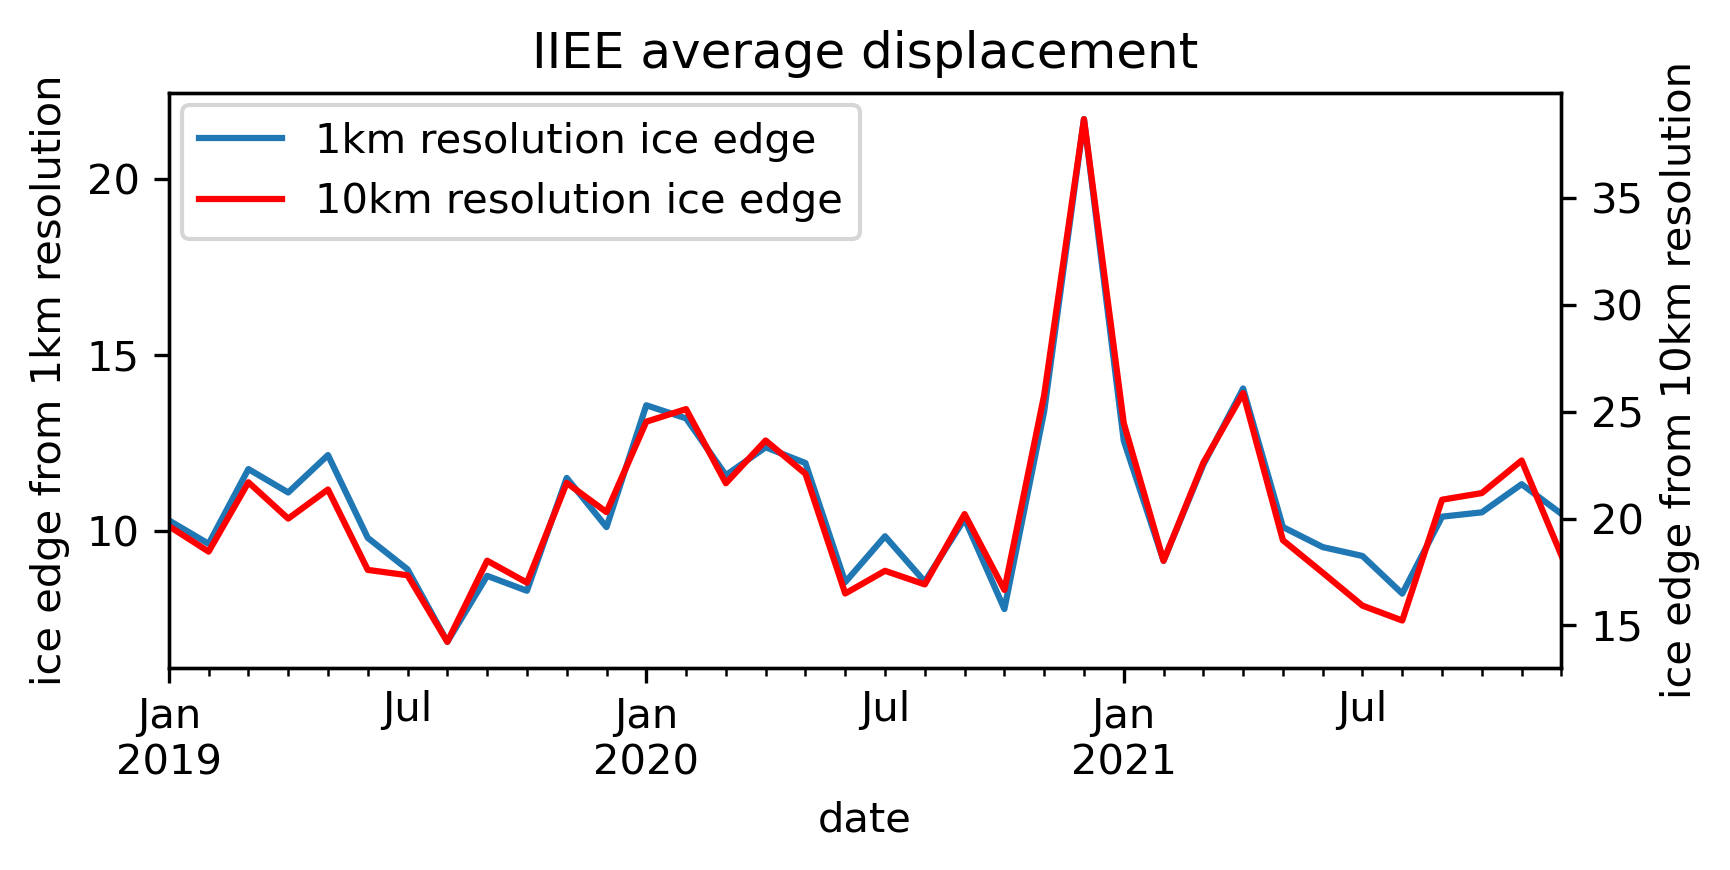

In [37]:
ax = normalized_iiee_1km.plot(label='1km resolution ice edge')
ax2 = ax.twinx()
ax.set_title('IIEE average displacement')#, fontsize = 20)
ax.set_ylabel('ice edge from 1km resolution')#, fontsize = 15)
ax2.set_ylabel('ice edge from 10km resolution')#, fontsize = 15)
normalized_iiee_1km_by_10km.plot(ax=ax2, color='red', label="10km resolution ice edge")
fig = ax.get_figure()
fig.set_size_inches(6, 3)
fig.legend(loc = 'upper left', bbox_to_anchor=(0.12,0.89))
plt.tight_layout()
fig.savefig('/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/normalized_iiee.pdf')

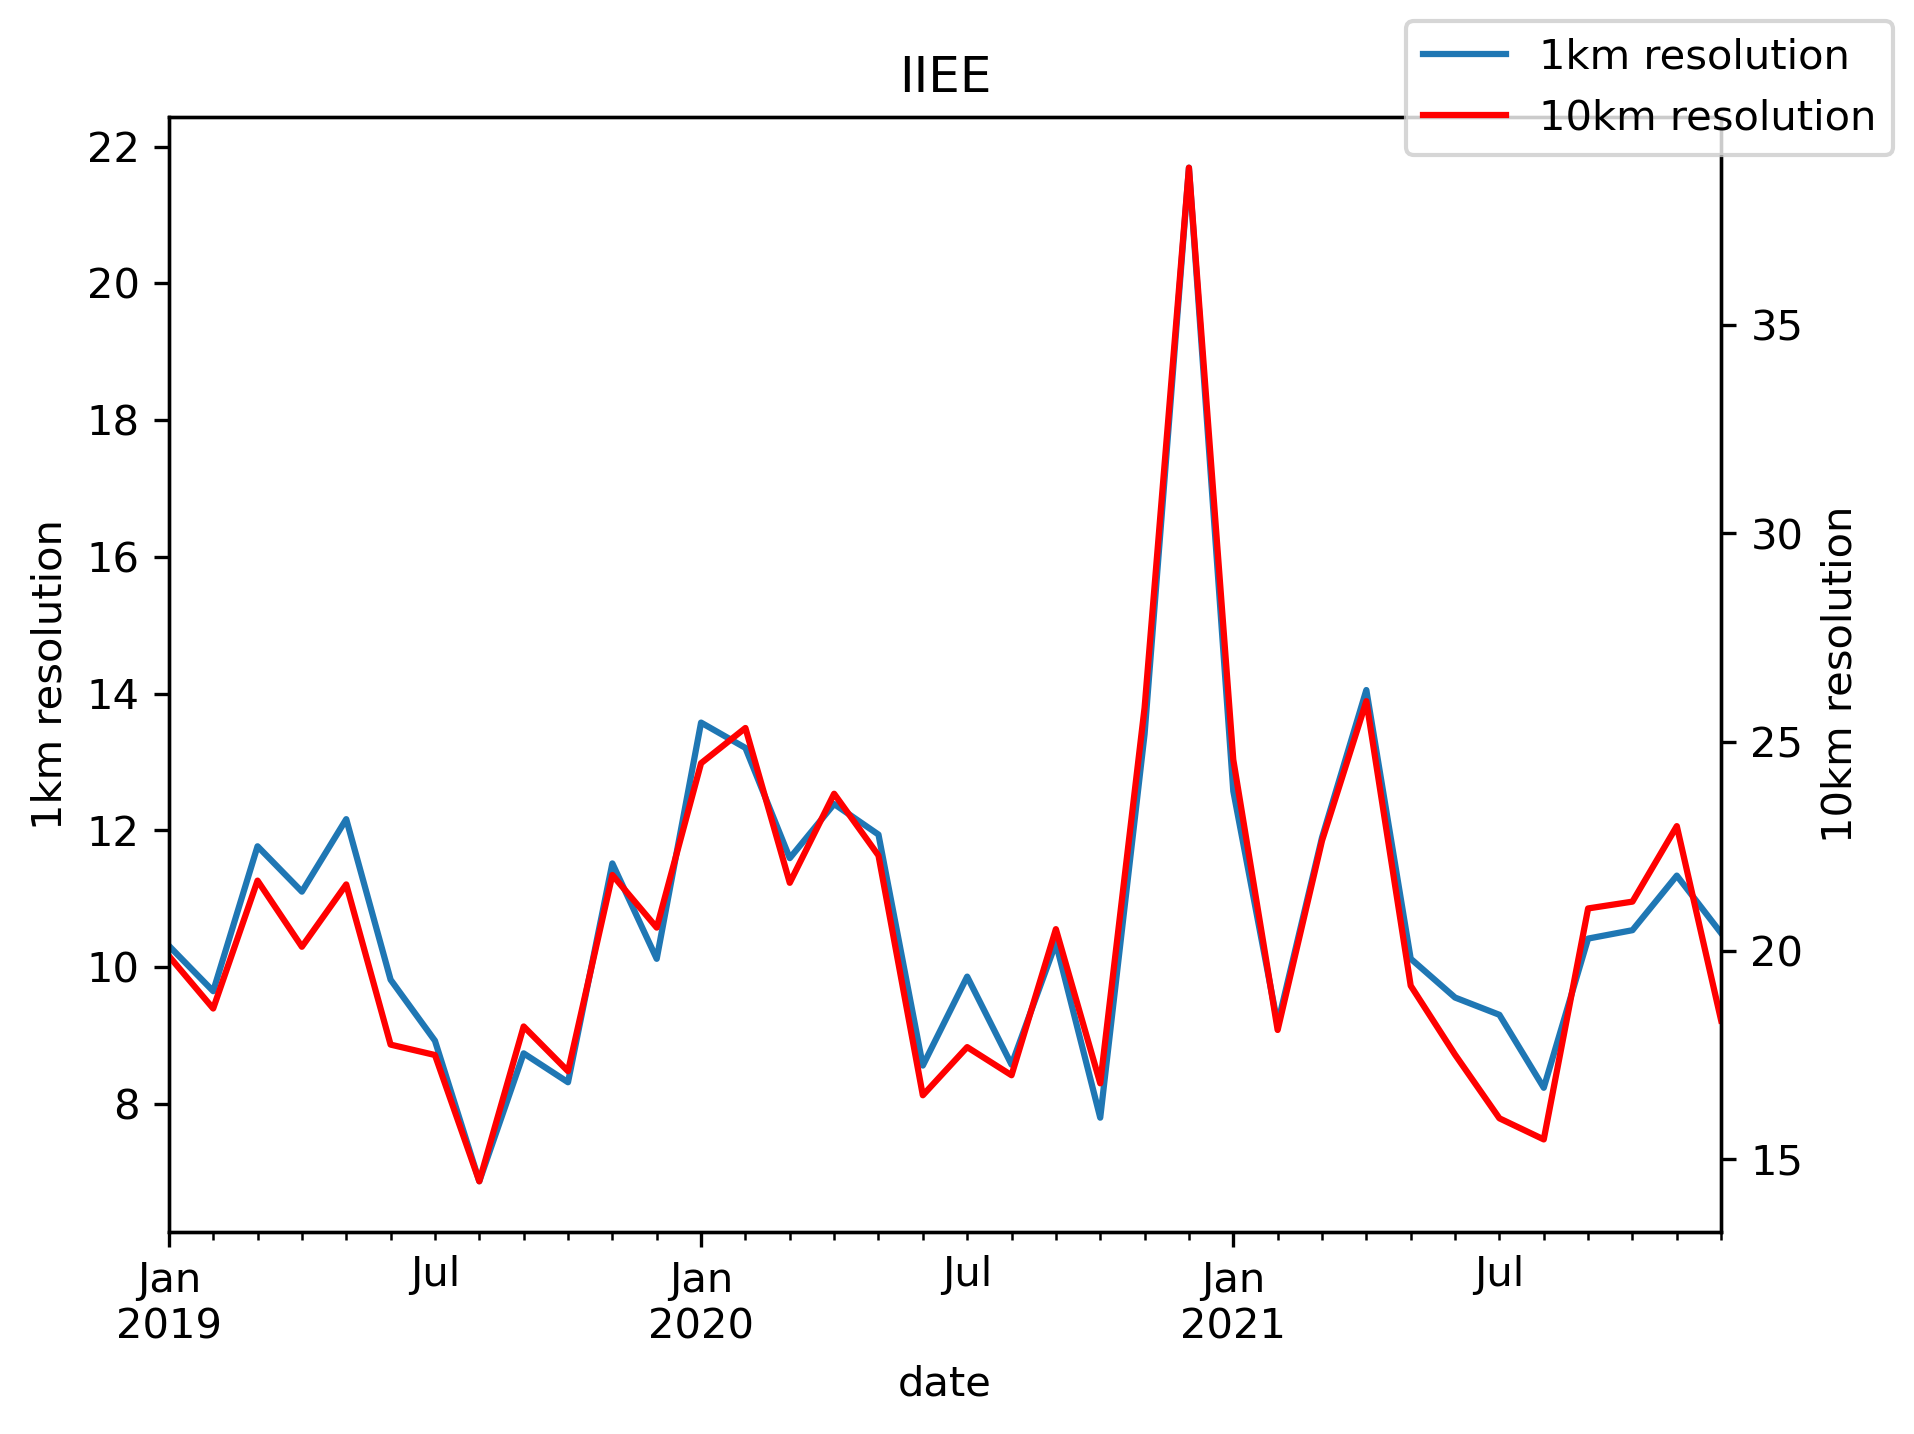

In [24]:
ax = normalized_iiee_1km.plot(label='1km resolution')
ax2 = ax.twinx()
ax.set_title('IIEE')
ax.set_ylabel('1km resolution')
ax2.set_ylabel('10km resolution')
normalized_iiee_10km.plot(ax=ax2, color='red', label="10km resolution")
fig = ax.get_figure()
fig.legend()
plt.tight_layout()
# fig.savefig('normalized_iiee.png')

In [29]:
print(normalized_iiee_1km.corr(normalized_iiee_10km))

0.9785940872783626


In [33]:
print((normalized_iiee_1km_by_10km - normalized_iiee_10km).mean())

-0.12108243041111383


In [ ]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

In [ ]:
ax = monthly_mean_lenght_10km.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_10km.plot(ax=ax2, color='red')

In [ ]:
# monthly_mean_lenght_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['mean_length'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
monthly_mean_lenght_pers = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].agg(totallow_value='min', high_value='max', mean='mean')
monthly_mean_IIEE_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['IIEE'].mean()

In [ ]:
monthly_mean_lenght_pers

In [ ]:
ax = monthly_mean_lenght_pers.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_pers.plot(ax=ax2, color='red')

In [ ]:
data_1km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_output.csv", index_col='date')
data_10km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_output.csv", index_col='date')

In [ ]:
data_10km

In [ ]:
data_1km['mean_length'].corr(data_1km['IIEE'])

In [ ]:
data_10km['mean_length'].corr(data_10km['IIEE'])

In [ ]:
data_1km['IIEE'].corr(data_10km['IIEE'])

In [ ]:
monthly_mean_lenght = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['mean_length'].mean()

monthly_mean_IIEE = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['IIEE'].mean()

In [ ]:
ax = monthly_mean_lenght.plot()
ax2 = ax.twinx()
monthly_mean_IIEE.plot(ax=ax2, color='red')